In [1]:
from pharmacophore import Pharmacophore
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

In [2]:
def generate_conformers(molecule, n_conformers, random_seed=-1, alignment=False):
    """Generate n conformers for a molecule"""
    molecule = Chem.AddHs(molecule) # Add hydrogens to generate realistic geometries
    cids = AllChem.EmbedMultipleConfs(molecule, numConfs=n_conformers, randomSeed=random_seed)
    
    if alignment:
        AllChem.AlignMolConformers(molecule)
    return molecule

5 molecules


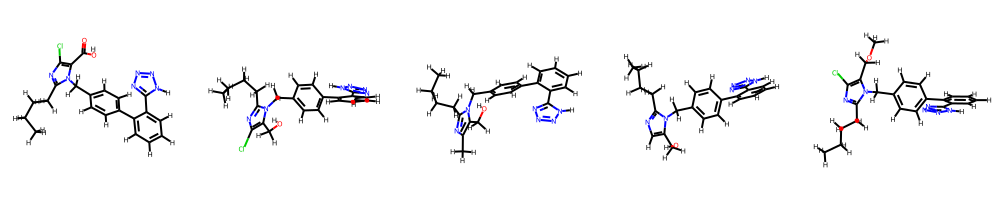

In [3]:
# Load inhibitors from smi file 
molecules = Chem.SmilesMolSupplier('../data/clique/molecules.smi',delimiter='\t',titleLine=False)
molecules = [generate_conformers(mol, 1, random_seed=1) for mol in molecules]
print(f"{len(molecules)} molecules")
# Visualize molecules
Draw.MolsToGridImage(molecules, molsPerRow=5)

In [4]:
ph = Pharmacophore(molecules)
print(ph.features)

{}


In [5]:
ph.ligands

In [6]:
ph.common_pharmacophore(method='dbscan', feat_list=['Acceptor', 'Aromatic'])

In [7]:
ph.features

{'Acceptor': [[-3.8694307548007245, -1.845239422752509, -0.9771869056689536]],
 'Aromatic': [[4.917882096201922, 1.1894447082934572, -1.547918268786257],
  [1.1836249653991535, 0.2164479663609792, 0.3537457682492084],
  [4.800981398815936, -0.4691049093146304, 1.5554687863616845]]}

In [9]:
ph.visualize()

NGLWidget()